In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display
from ipywidgets import fixed, interact, interact_manual, interactive
from sklearn.feature_selection import SelectKBest
from matlearn.models import LogisticRegressor
plt.style.use('fivethirtyeight')
display(HTML("<style>.container { width:89% !important; }</style>"))

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')

## about data

In [3]:
print('number of rows : {} , number of columns : {}'.format(
    df.shape[0], df.shape[1]))
print()
print('keys : {}'.format(df.keys()))
print()
print(df.index)
print('\n')
print('information : \n{}'.format(df.info()))
print('\n')
print(df.describe())
print('\n')
print('data types : \n{}'.format(df.dtypes))
print('\n')
print('first 3:\n', df.head(3), '\n\nlast 3 : \n', df.tail(3))

number of rows : 41188 , number of columns : 21

keys : Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

RangeIndex(start=0, stop=41188, step=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

fortunately , data set contains no missing values :)

In [5]:
l = ['job', 'marital', 'education', 'housing', 'loan',
     'default', 'contact', 'month', 'poutcome', 'y']
for i in l:
    print(f'all kinds of {i} : {df[i].unique()}\n ')

all kinds of job : ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
 
all kinds of marital : ['married' 'single' 'divorced' 'unknown']
 
all kinds of education : ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
 
all kinds of housing : ['yes' 'no' 'unknown']
 
all kinds of loan : ['no' 'yes' 'unknown']
 
all kinds of default : ['unknown' 'no' 'yes']
 
all kinds of contact : ['cellular' 'telephone']
 
all kinds of month : ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
 
all kinds of poutcome : ['nonexistent' 'success' 'failure']
 
all kinds of y : [0 1]
 


In [6]:
df.groupby('marital').std()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,10.625599,249.026266,2.646026,170.980517,0.485924,1.510183,0.564927,4.457109,1.685265,70.302989,0.304265
married,10.018179,258.840452,2.825503,174.721317,0.465843,1.534283,0.574225,4.563881,1.683059,69.162803,0.302091
single,7.534553,263.958516,2.687634,215.247752,0.553229,1.642789,0.589629,4.794192,1.822891,77.969475,0.347045
unknown,10.784394,285.088260,3.785695,241.252722,0.550604,1.652975,0.629093,5.062080,1.805199,70.034406,0.359324


In [7]:
df.groupby(['job']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [8]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [9]:
df.groupby('contact').median()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
contact,,,,,,,,,,,
cellular,38.0,182.0,2.0,999.0,0.0,-0.1,93.200,-42.7,4.076,5195.8,0.0
telephone,39.0,176.0,2.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,0.0


In [10]:
df.groupby('month').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
month,,,,,,,,,,,
apr,40.593845,293.200608,1.947188,955.587386,0.323328,-1.800000,93.119558,-46.273632,1.361070,5093.123708,0.204787
aug,41.644221,232.430722,2.666559,961.062156,0.115410,0.747151,93.311065,-35.597184,4.300623,5200.248349,0.106021
dec,47.307692,345.609890,2.159341,748.060440,0.615385,-2.846154,92.715363,-33.708791,0.865319,5031.895604,0.489011
jul,39.035545,273.426122,3.160998,982.700725,0.047115,1.158921,93.894923,-42.370170,4.685678,5214.078575,0.090466
jun,39.766077,242.561301,3.072208,970.221512,0.083114,0.688379,94.245402,-41.579428,4.256908,5197.493193,0.105115
mar,40.778388,245.946886,2.203297,835.454212,0.483516,-1.800000,93.097330,-42.650549,1.162745,5055.390110,0.505495
may,39.031084,261.231752,2.439756,981.120415,0.164209,-0.164972,93.528882,-40.579272,3.293665,5149.521592,0.064347
nov,40.965618,245.855645,1.909290,952.950256,0.293587,-0.418483,93.200943,-41.238747,3.723123,5173.031236,0.101439
oct,44.171309,288.367688,1.545961,781.909471,0.647632,-2.438579,93.175107,-34.580919,1.200123,5018.823816,0.438719


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 




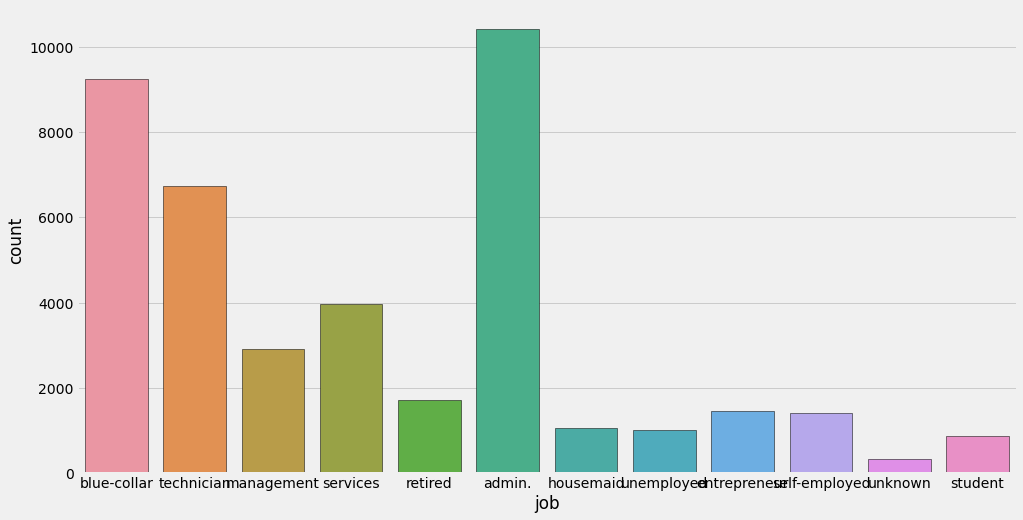

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 




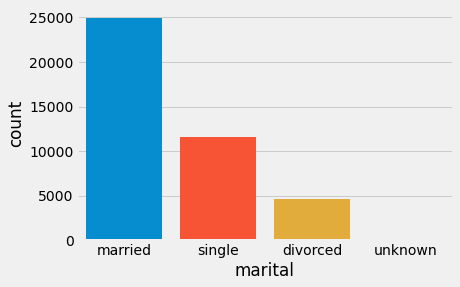

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 




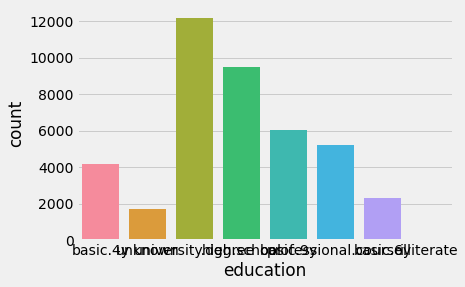

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 




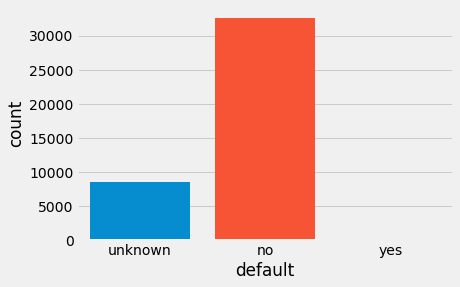

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 




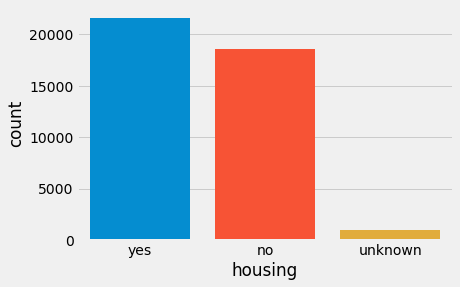

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 




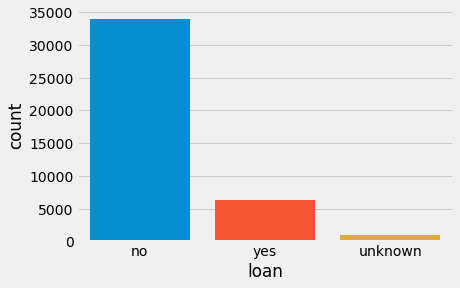

cellular     26144
telephone    15044
Name: contact, dtype: int64 




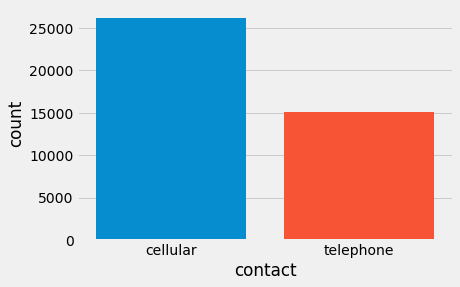

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64 




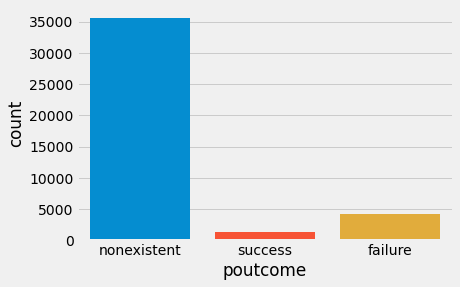

0    36548
1     4640
Name: y, dtype: int64 




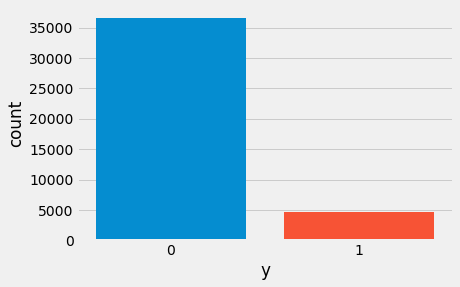

In [11]:
selected_rows=['job','marital','education','default','housing','loan','contact','poutcome','y']
for row in selected_rows:
    print(df[row].value_counts(normalize=False,ascending=False),'\n\n')
    if row != 'job':
        sns.countplot(data=df,x=row,saturation=.95)
    else:
        fig1 = plt.figure(figsize=(15,8))
        sns.countplot(data=df,x=row,edgecolor='black')
    plt.show()

### visual analysis

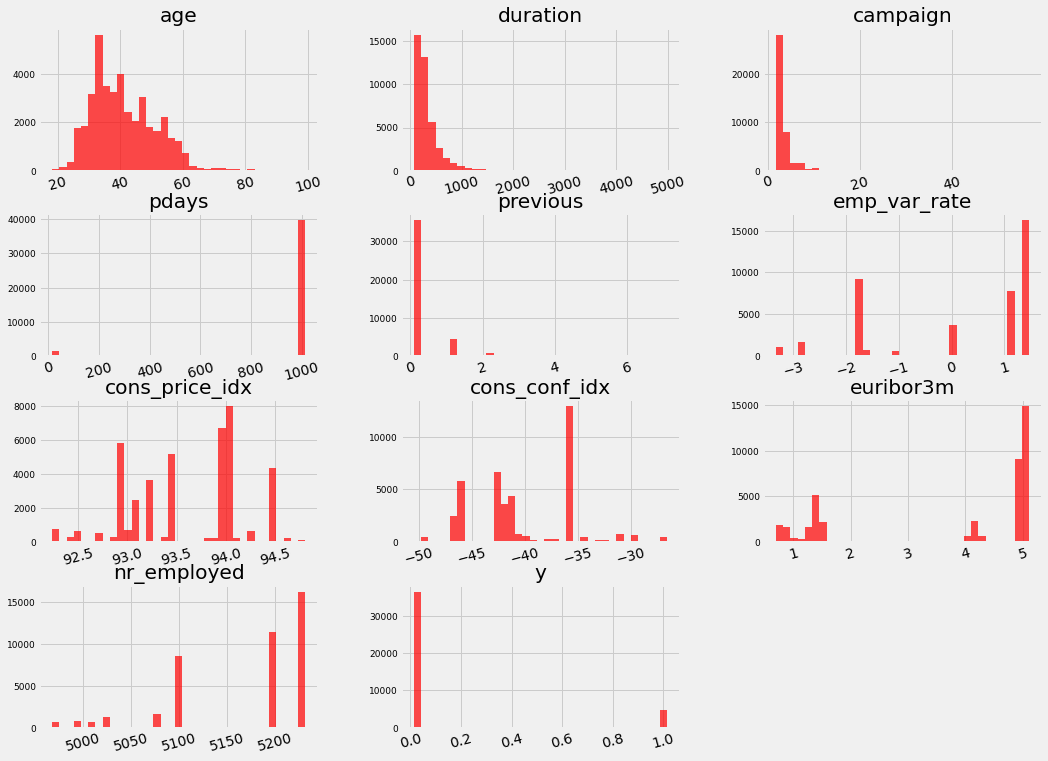

In [12]:
pd.plotting.hist_frame(df,color='red',figsize=(16,12),bins=35,xrot=15,ylabelsize=9,align='right',alpha=.7);


job status :


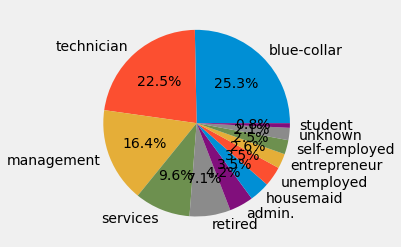


marital status :


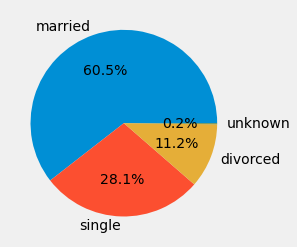


education status :


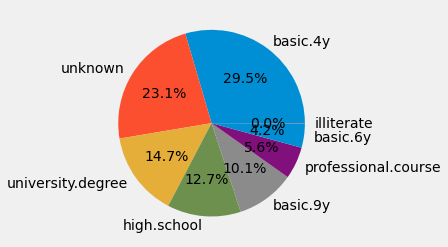


default status :


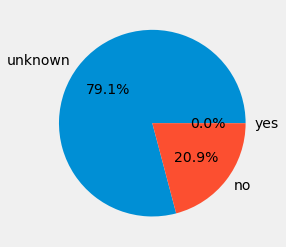


housing status :


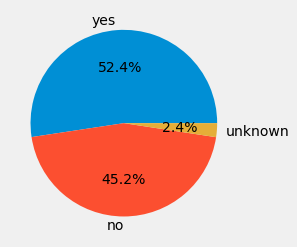


loan status :


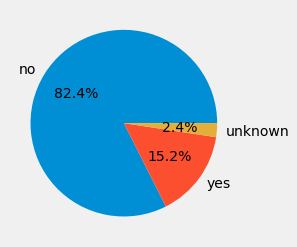


contact status :


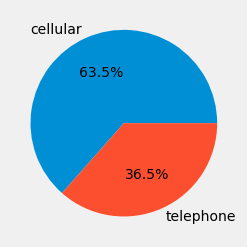


poutcome status :


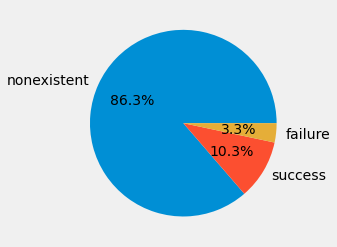


y status :


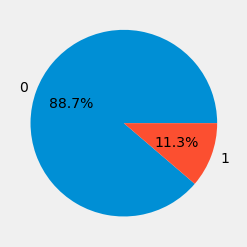

In [13]:
def to_num(series):
    return list(series.value_counts())
for row in selected_rows:
    print(f'\n{row} status :')
    plt.pie(to_num(df[row]),labels=df[row].unique(),autopct="%1.1f%%")
    plt.show()

y                 0     1
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37




y             0     1
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12




y                        0     1
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251




y            0     1
default             
no       28391  4197
unknown   8154   443
yes          3     0




y            0     1
housing             
no       16

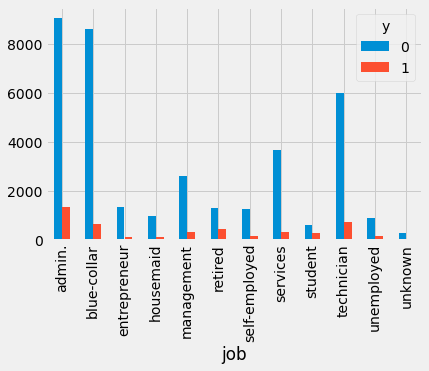

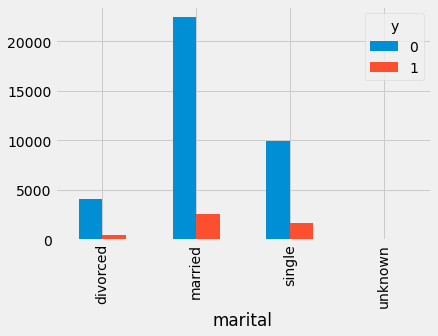

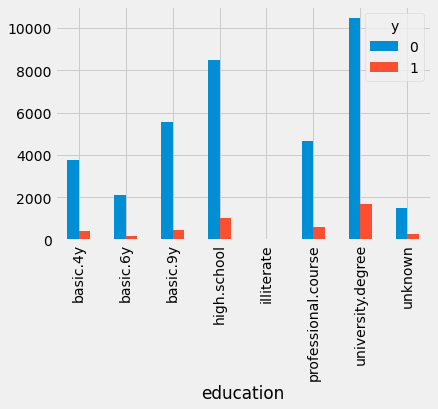

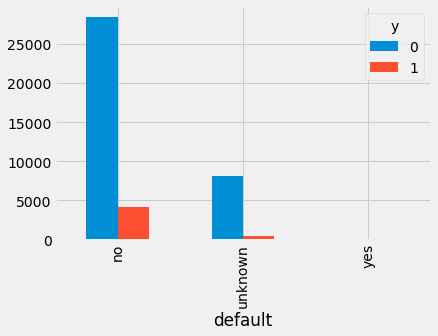

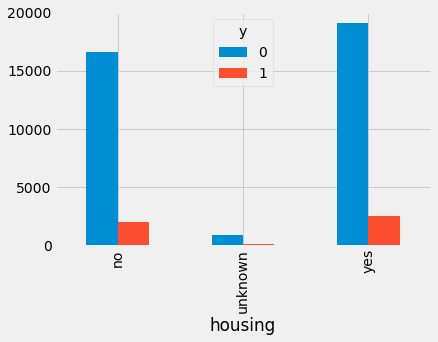

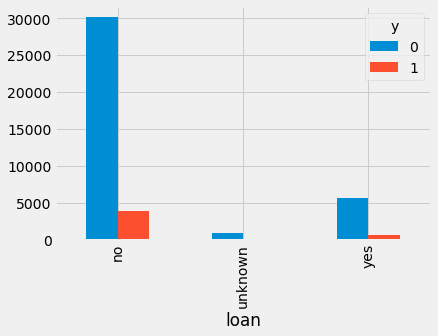

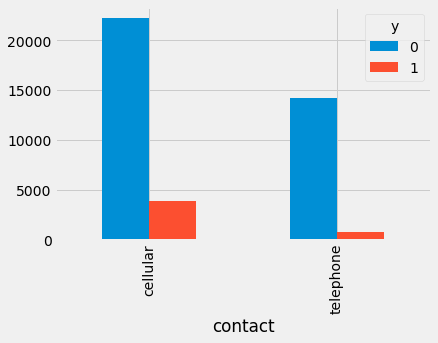

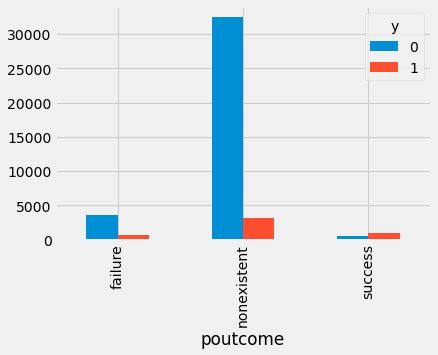

In [14]:
for row in selected_rows[:-1]:
    print(_t:=pd.crosstab(df[row],df['y']))
    _t.plot(kind='bar')
    print('\n\n\n')

## pre processing and train

since the data is imbalanced , I'm gonna use an additional data set ( later i will use under/over smapling)

### dummy variables

In [15]:
temp_df = pd.get_dummies(df.iloc[:,:-1])
temp_df['y'] = df['y']
df = temp_df
del temp_df
print(df.shape)
df['y'].unique()

(41188, 64)


array([0, 1], dtype=int64)

In [16]:
print(df.keys())

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [17]:
x = df.values[:, :-1]
y = df.values[:, -1].reshape(-1,1)
print(x.shape,'\n',y.shape,'\n')

(41188, 63) 
 (41188, 1) 



### feature selection

In [18]:
sb = SelectKBest(k=40)
sb = sb.fit(x,y.ravel())
selected_features = sb.get_support()
print('selected features : \n\n',pd.DataFrame(x,columns=df.columns[:-1]).columns[selected_features])
x =sb.transform(x)
x.shape

selected features : 

 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_retired',
       'job_services', 'job_student', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_dec', 'month_jul', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


(41188, 40)

### split train and test

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32950, 40), (8238, 40), (32950, 1), (8238, 1))

###  under/over sampling

In [21]:
from imblearn.combine import SMOTETomek
smot = SMOTETomek()
x_train,y_train = smot.fit_resample(x_train,y_train)

### standardization

In [22]:
from sklearn.preprocessing import MinMaxScaler
stn = MinMaxScaler()
x_train = stn.fit_transform(x_train)

### train

In [23]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((57940, 40), (57940,), (8238, 40), (8238, 1))

In [24]:
my_clf = LogisticRegressor(activ='sigmoid', n_reports=2000, maxEpoch=200,
                           n_iter_per_epoch=10, n_converLim=5, converLim=.00001, lr=.05, train_bias=True,use_validation=True)
my_clf.train(x_train, y_train)



 **** EPOCH 1 ****

iteration   1: training loss = 0.94  |   validation loss = 0.99
iteration   2: training loss = 0.95  |   validation loss = 0.98
iteration   3: training loss = 0.94  |   validation loss = 0.99
iteration   4: training loss = 0.94  |   validation loss = 0.91
iteration   5: training loss = 0.95  |   validation loss = 0.94
iteration   6: training loss = 0.94  |   validation loss = 0.90
iteration   7: training loss = 0.92  |   validation loss = 0.96
iteration   8: training loss = 0.94  |   validation loss = 0.90
iteration   9: training loss = 0.91  |   validation loss = 0.94
iteration  10: training loss = 0.92  |   validation loss = 0.93


 **** EPOCH 2 ****

iteration   1: training loss = 0.91  |   validation loss = 0.96
iteration   2: training loss = 0.91  |   validation loss = 0.87
iteration   3: training loss = 0.92  |   validation loss = 0.93
iteration   4: training loss = 0.90  |   validation loss = 0.93
iteration   5: training loss = 0.89  |   validation loss = 0

iteration   4: training loss = 0.73  |   validation loss = 0.68
iteration   5: training loss = 0.72  |   validation loss = 0.73
iteration   6: training loss = 0.71  |   validation loss = 0.71
iteration   7: training loss = 0.74  |   validation loss = 0.69
iteration   8: training loss = 0.70  |   validation loss = 0.73
iteration   9: training loss = 0.73  |   validation loss = 0.69
iteration  10: training loss = 0.73  |   validation loss = 0.70


 **** EPOCH 17 ****

iteration   1: training loss = 0.72  |   validation loss = 0.71
iteration   2: training loss = 0.74  |   validation loss = 0.69
iteration   3: training loss = 0.70  |   validation loss = 0.73
iteration   4: training loss = 0.72  |   validation loss = 0.77
iteration   5: training loss = 0.72  |   validation loss = 0.75
iteration   6: training loss = 0.70  |   validation loss = 0.69
iteration   7: training loss = 0.71  |   validation loss = 0.74
iteration   8: training loss = 0.72  |   validation loss = 0.76
iteration   9: tr

iteration  10: training loss = 0.65  |   validation loss = 0.73


 **** EPOCH 30 ****

iteration   1: training loss = 0.65  |   validation loss = 0.60
iteration   2: training loss = 0.65  |   validation loss = 0.62
iteration   3: training loss = 0.66  |   validation loss = 0.66
iteration   4: training loss = 0.65  |   validation loss = 0.71
iteration   5: training loss = 0.65  |   validation loss = 0.68
iteration   6: training loss = 0.64  |   validation loss = 0.64
iteration   7: training loss = 0.65  |   validation loss = 0.68
iteration   8: training loss = 0.64  |   validation loss = 0.66
iteration   9: training loss = 0.65  |   validation loss = 0.59
iteration  10: training loss = 0.63  |   validation loss = 0.68


 **** EPOCH 31 ****

iteration   1: training loss = 0.65  |   validation loss = 0.65
iteration   2: training loss = 0.65  |   validation loss = 0.64
iteration   3: training loss = 0.64  |   validation loss = 0.64
iteration   4: training loss = 0.63  |   validation loss =

iteration   1: training loss = 0.62  |   validation loss = 0.60
iteration   2: training loss = 0.62  |   validation loss = 0.61
iteration   3: training loss = 0.59  |   validation loss = 0.61
iteration   4: training loss = 0.60  |   validation loss = 0.61
iteration   5: training loss = 0.60  |   validation loss = 0.61
iteration   6: training loss = 0.61  |   validation loss = 0.62
iteration   7: training loss = 0.61  |   validation loss = 0.64
iteration   8: training loss = 0.60  |   validation loss = 0.60
iteration   9: training loss = 0.59  |   validation loss = 0.64
iteration  10: training loss = 0.60  |   validation loss = 0.63


 **** EPOCH 46 ****

iteration   1: training loss = 0.61  |   validation loss = 0.60
iteration   2: training loss = 0.60  |   validation loss = 0.61
iteration   3: training loss = 0.59  |   validation loss = 0.60
iteration   4: training loss = 0.60  |   validation loss = 0.58
iteration   5: training loss = 0.60  |   validation loss = 0.63
iteration   6: tr

iteration   5: training loss = 0.58  |   validation loss = 0.52
iteration   6: training loss = 0.58  |   validation loss = 0.56
iteration   7: training loss = 0.58  |   validation loss = 0.57
iteration   8: training loss = 0.57  |   validation loss = 0.62
iteration   9: training loss = 0.58  |   validation loss = 0.61
iteration  10: training loss = 0.57  |   validation loss = 0.57


 **** EPOCH 62 ****

iteration   1: training loss = 0.57  |   validation loss = 0.58
iteration   2: training loss = 0.58  |   validation loss = 0.62
iteration   3: training loss = 0.58  |   validation loss = 0.57
iteration   4: training loss = 0.60  |   validation loss = 0.55
iteration   5: training loss = 0.57  |   validation loss = 0.57
iteration   6: training loss = 0.57  |   validation loss = 0.55
iteration   7: training loss = 0.58  |   validation loss = 0.58
iteration   8: training loss = 0.58  |   validation loss = 0.59
iteration   9: training loss = 0.56  |   validation loss = 0.53
iteration  10: tr

iteration  10: training loss = 0.56  |   validation loss = 0.56


 **** EPOCH 76 ****

iteration   1: training loss = 0.56  |   validation loss = 0.56
iteration   2: training loss = 0.56  |   validation loss = 0.54
iteration   3: training loss = 0.56  |   validation loss = 0.55
iteration   4: training loss = 0.57  |   validation loss = 0.61
iteration   5: training loss = 0.56  |   validation loss = 0.54
iteration   6: training loss = 0.56  |   validation loss = 0.56
iteration   7: training loss = 0.57  |   validation loss = 0.58
iteration   8: training loss = 0.56  |   validation loss = 0.54
iteration   9: training loss = 0.57  |   validation loss = 0.56
iteration  10: training loss = 0.56  |   validation loss = 0.57


 **** EPOCH 77 ****

iteration   1: training loss = 0.56  |   validation loss = 0.59
iteration   2: training loss = 0.56  |   validation loss = 0.60
iteration   3: training loss = 0.56  |   validation loss = 0.58
iteration   4: training loss = 0.56  |   validation loss =

iteration   3: training loss = 0.55  |   validation loss = 0.56
iteration   4: training loss = 0.55  |   validation loss = 0.59
iteration   5: training loss = 0.54  |   validation loss = 0.55
iteration   6: training loss = 0.54  |   validation loss = 0.55
iteration   7: training loss = 0.56  |   validation loss = 0.54
iteration   8: training loss = 0.56  |   validation loss = 0.54
iteration   9: training loss = 0.55  |   validation loss = 0.53
iteration  10: training loss = 0.54  |   validation loss = 0.52


 **** EPOCH 93 ****

iteration   1: training loss = 0.55  |   validation loss = 0.52
iteration   2: training loss = 0.56  |   validation loss = 0.55
iteration   3: training loss = 0.54  |   validation loss = 0.55
iteration   4: training loss = 0.55  |   validation loss = 0.57
iteration   5: training loss = 0.54  |   validation loss = 0.55
iteration   6: training loss = 0.55  |   validation loss = 0.54
iteration   7: training loss = 0.54  |   validation loss = 0.55
iteration   8: tr

iteration   7: training loss = 0.54  |   validation loss = 0.56
iteration   8: training loss = 0.54  |   validation loss = 0.55
iteration   9: training loss = 0.54  |   validation loss = 0.54
iteration  10: training loss = 0.55  |   validation loss = 0.55


 **** EPOCH 106 ****

iteration   1: training loss = 0.54  |   validation loss = 0.54
iteration   2: training loss = 0.53  |   validation loss = 0.54
iteration   3: training loss = 0.55  |   validation loss = 0.53
iteration   4: training loss = 0.55  |   validation loss = 0.55
iteration   5: training loss = 0.54  |   validation loss = 0.57
iteration   6: training loss = 0.54  |   validation loss = 0.56
iteration   7: training loss = 0.55  |   validation loss = 0.54
iteration   8: training loss = 0.55  |   validation loss = 0.54
iteration   9: training loss = 0.53  |   validation loss = 0.51
iteration  10: training loss = 0.53  |   validation loss = 0.50


 **** EPOCH 107 ****

iteration   1: training loss = 0.55  |   validation loss

iteration   9: training loss = 0.54  |   validation loss = 0.55
iteration  10: training loss = 0.53  |   validation loss = 0.53


 **** EPOCH 119 ****

iteration   1: training loss = 0.55  |   validation loss = 0.53
iteration   2: training loss = 0.52  |   validation loss = 0.54
iteration   3: training loss = 0.52  |   validation loss = 0.57
iteration   4: training loss = 0.54  |   validation loss = 0.50
iteration   5: training loss = 0.54  |   validation loss = 0.54
iteration   6: training loss = 0.54  |   validation loss = 0.57
iteration   7: training loss = 0.54  |   validation loss = 0.53
iteration   8: training loss = 0.52  |   validation loss = 0.51
iteration   9: training loss = 0.55  |   validation loss = 0.58
iteration  10: training loss = 0.53  |   validation loss = 0.52


 **** EPOCH 120 ****

iteration   1: training loss = 0.53  |   validation loss = 0.59
iteration   2: training loss = 0.52  |   validation loss = 0.55
iteration   3: training loss = 0.54  |   validation loss

iteration   8: training loss = 0.53  |   validation loss = 0.49
iteration   9: training loss = 0.52  |   validation loss = 0.55
iteration  10: training loss = 0.52  |   validation loss = 0.53


 **** EPOCH 132 ****

iteration   1: training loss = 0.53  |   validation loss = 0.54
iteration   2: training loss = 0.53  |   validation loss = 0.51
iteration   3: training loss = 0.53  |   validation loss = 0.53
iteration   4: training loss = 0.54  |   validation loss = 0.53
iteration   5: training loss = 0.52  |   validation loss = 0.52
iteration   6: training loss = 0.52  |   validation loss = 0.53
iteration   7: training loss = 0.54  |   validation loss = 0.53
iteration   8: training loss = 0.53  |   validation loss = 0.55
iteration   9: training loss = 0.54  |   validation loss = 0.52
iteration  10: training loss = 0.53  |   validation loss = 0.51


 **** EPOCH 133 ****

iteration   1: training loss = 0.54  |   validation loss = 0.57
iteration   2: training loss = 0.52  |   validation loss

iteration   5: training loss = 0.52  |   validation loss = 0.52
iteration   6: training loss = 0.52  |   validation loss = 0.52
iteration   7: training loss = 0.52  |   validation loss = 0.56
iteration   8: training loss = 0.52  |   validation loss = 0.52
iteration   9: training loss = 0.52  |   validation loss = 0.56
iteration  10: training loss = 0.53  |   validation loss = 0.52


 **** EPOCH 146 ****

iteration   1: training loss = 0.53  |   validation loss = 0.54
iteration   2: training loss = 0.51  |   validation loss = 0.53
iteration   3: training loss = 0.52  |   validation loss = 0.52
iteration   4: training loss = 0.54  |   validation loss = 0.53
iteration   5: training loss = 0.52  |   validation loss = 0.51
iteration   6: training loss = 0.52  |   validation loss = 0.52
iteration   7: training loss = 0.52  |   validation loss = 0.54
iteration   8: training loss = 0.52  |   validation loss = 0.54
iteration   9: training loss = 0.52  |   validation loss = 0.53
iteration  10: t

iteration   7: training loss = 0.52  |   validation loss = 0.53
iteration   8: training loss = 0.52  |   validation loss = 0.54
iteration   9: training loss = 0.52  |   validation loss = 0.55
iteration  10: training loss = 0.52  |   validation loss = 0.52


 **** EPOCH 159 ****

iteration   1: training loss = 0.52  |   validation loss = 0.56
iteration   2: training loss = 0.52  |   validation loss = 0.56
iteration   3: training loss = 0.52  |   validation loss = 0.50
iteration   4: training loss = 0.52  |   validation loss = 0.52
iteration   5: training loss = 0.52  |   validation loss = 0.49
iteration   6: training loss = 0.53  |   validation loss = 0.51
iteration   7: training loss = 0.53  |   validation loss = 0.53
iteration   8: training loss = 0.52  |   validation loss = 0.52
iteration   9: training loss = 0.52  |   validation loss = 0.53
iteration  10: training loss = 0.52  |   validation loss = 0.56


 **** EPOCH 160 ****

iteration   1: training loss = 0.52  |   validation loss

iteration   3: training loss = 0.52  |   validation loss = 0.53
iteration   4: training loss = 0.51  |   validation loss = 0.51
iteration   5: training loss = 0.52  |   validation loss = 0.50
iteration   6: training loss = 0.52  |   validation loss = 0.54
iteration   7: training loss = 0.52  |   validation loss = 0.50
iteration   8: training loss = 0.52  |   validation loss = 0.54
iteration   9: training loss = 0.51  |   validation loss = 0.53
iteration  10: training loss = 0.52  |   validation loss = 0.49


 **** EPOCH 173 ****

iteration   1: training loss = 0.53  |   validation loss = 0.51
iteration   2: training loss = 0.52  |   validation loss = 0.49
iteration   3: training loss = 0.51  |   validation loss = 0.51
iteration   4: training loss = 0.53  |   validation loss = 0.52
iteration   5: training loss = 0.51  |   validation loss = 0.48
iteration   6: training loss = 0.52  |   validation loss = 0.51
iteration   7: training loss = 0.52  |   validation loss = 0.49
iteration   8: t

iteration   4: training loss = 0.52  |   validation loss = 0.51
iteration   5: training loss = 0.52  |   validation loss = 0.51
iteration   6: training loss = 0.51  |   validation loss = 0.51
iteration   7: training loss = 0.52  |   validation loss = 0.50
iteration   8: training loss = 0.52  |   validation loss = 0.51
iteration   9: training loss = 0.51  |   validation loss = 0.52
iteration  10: training loss = 0.51  |   validation loss = 0.54


 **** EPOCH 186 ****

iteration   1: training loss = 0.52  |   validation loss = 0.50
iteration   2: training loss = 0.52  |   validation loss = 0.52
iteration   3: training loss = 0.52  |   validation loss = 0.53
iteration   4: training loss = 0.51  |   validation loss = 0.52
iteration   5: training loss = 0.51  |   validation loss = 0.50
iteration   6: training loss = 0.51  |   validation loss = 0.51
iteration   7: training loss = 0.51  |   validation loss = 0.52
iteration   8: training loss = 0.51  |   validation loss = 0.51
iteration   9: t

iteration   1: training loss = 0.52  |   validation loss = 0.50
iteration   2: training loss = 0.52  |   validation loss = 0.51
iteration   3: training loss = 0.51  |   validation loss = 0.51
iteration   4: training loss = 0.52  |   validation loss = 0.53
iteration   5: training loss = 0.50  |   validation loss = 0.53
iteration   6: training loss = 0.51  |   validation loss = 0.51
iteration   7: training loss = 0.51  |   validation loss = 0.52
iteration   8: training loss = 0.51  |   validation loss = 0.50
iteration   9: training loss = 0.52  |   validation loss = 0.49
iteration  10: training loss = 0.51  |   validation loss = 0.54


 **** EPOCH 200 ****

iteration   1: training loss = 0.51  |   validation loss = 0.49
iteration   2: training loss = 0.50  |   validation loss = 0.51
iteration   3: training loss = 0.51  |   validation loss = 0.52
iteration   4: training loss = 0.51  |   validation loss = 0.51
iteration   5: training loss = 0.50  |   validation loss = 0.53
iteration   6: t

In [25]:
my_p = my_clf.predict(x_test)

In [26]:
np.unique(my_p,return_counts=True)

(array([0., 1.]), array([5617, 2621], dtype=int64))

In [27]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='liblinear')
log.fit(x_train,y_train);

In [28]:
sk_p = log.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print(accuracy_score(y_test,my_p))
print(accuracy_score(y_test,sk_p))
print()
print(recall_score(y_test,my_p))
print(recall_score(y_test,sk_p))
print()
print(precision_score(y_test,my_p))
print(precision_score(y_test,sk_p))
print()
print(f1_score(y_test,my_p))
print(f1_score(y_test,sk_p))
print()

0.7538237436270939
0.8800679776644816

0.8117770767613038
0.4637223974763407

0.29454406714994275
0.47986942328618065

0.43225083986562146
0.4716577540106952



In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, my_p)

array([[5438, 1849],
       [ 179,  772]], dtype=int64)

In [31]:
confusion_matrix(y_test, sk_p)

array([[6809,  478],
       [ 510,  441]], dtype=int64)

 thanks